In [1]:
import pandas as pd
import numpy as np

# to work with json files and flatten them
import json

# for conversion to datetime
import datetime

# visualization
import plotly
import chart_studio.plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objects as go
# to have plotly working in my notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# to make everything work locally
cf.go_offline()
# to show everything on notebook
%matplotlib inline

In [2]:
# fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
# channelGrouping - The channel via which the user came to the Store.
# date - The date on which the user visited the Store.
# device - The specifications for the device used to access the Store.
# geoNetwork - This section contains information about the geography of the user.
# socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
# totals - This section contains aggregate values across the session.
# trafficSource - This section contains information about the Traffic Source from which the session originated.
# visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
# visitNumber - The session number for this user. If this is the first session, then this is set to 1.
# visitStartTime - The timestamp .
# hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
# customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.
# totals - This set of columns mostly includes high-level aggregate data.

In [2]:
df = pd.read_csv(r"train.csv")

C:\Users\Davide Della Valle\anacondanew\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   
2  Organic Search  20160902   
3  Organic Search  20160902   
4  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  1131660440785968503   
1  {"browser": "Firefox", "browserVersion": "not ...   377306020877927890   
2  {"browser": "Chrome", "browserVersion": "not a...  3895546263509774583   
3  {"browser": "UC Browser", "browserVersion": "n...  4763447161404445595   
4  {"browser": "Chrome", "browserVersion": "not a...    27294437909732085   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Western...   
1  {"continent": "Oceania", "subContinent": "Aust...   
2  {"continent": "Europe", "subContinent": "South...   
3  {"continent": "Asia", "subContinent": "Southea...   
4  {"continent": "Europe", "subContinent": "North...   

                        sessionId  socialEngagementType  \
0  1131660440785968503_1472830385  Not Socially Engaged   
1   377306020877927890_1472880147  Not Socially Engaged   
2  3895546263509774583_1472865386  Not Socially Engaged   
3  4763447161404445595_1472881213  Not Socially Engaged   
4    27294437909732085_1472822600  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   
2  {"visits": "1", "hits": "1", "pageviews": "1",...   
3  {"visits": "1", "hits": "1", "pageviews": "1",...   
4  {"visits": "1", "hits": "1", "pageviews": "1",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1472830385            1   
1  {"campaign": "(not set)", "source": "google", ...  1472880147            1   
2  {"campaign": "(not set)", "source": "google", ...  1472865386            1   
3  {"campaign": "(not set)", "source": "google", ...  1472881213            1   
4  {"campaign": "(not set)", "source": "google", ...  1472822600            2   

   visitStartTime  
0      1472830385  
1      1472880147  
2      1472865386  
3      1472881213  
4      1472822600

In [4]:
# the fullVisitorId is a unique identifier for each user of the Google Merchandise Store
# As shown below there are visitors visiting more than once, ant the number if unique visitors
# ???? check relationship with purchase

df.fullVisitorId.value_counts()[:100]

824839726118485274     205
1957458976293878100    205
1856749147915772585    151
3608475193341679870    149
7634897085866546110    131
                      ... 
7366117530963039873     32
4309363468347582056     32
7137924127061500750     32
7858365857178065663     31
8436426603099391262     31
Name: fullVisitorId, Length: 100, dtype: int64

In [5]:
print("Number of unique visitors in df: ",df.fullVisitorId.nunique(), " out of rows : ",df.shape[0])

Number of unique visitors in df:  742735  out of rows :  903653


In [6]:
# SPECIFIC CUSTOMER BEHAVIOUR
# the visitor ID 1957458976293878100 appears in the DF 205 times as reported from the previous value_counts. 
# It seems anyway that the same user has visited the Gstore 326 times as reported in visitNumber. The missing data might be in the test dataset or just not included in this samples.
df[df.fullVisitorId == "1957458976293878100"].sort_values(by=["visitNumber"])

channelGrouping      date  \
478864  Organic Search  20160810   
478176  Organic Search  20160810   
478367  Organic Search  20160810   
11357   Organic Search  20160811   
11005   Organic Search  20160811   
...                ...       ...   
6602           Display  20170623   
41081          Display  20170630   
466127         Display  20170711   
64846          Display  20170801   
64847          Display  20170801   

                                                   device  \
478864  {"browser": "Firefox", "browserVersion": "not ...   
478176  {"browser": "Firefox", "browserVersion": "not ...   
478367  {"browser": "Firefox", "browserVersion": "not ...   
11357   {"browser": "Firefox", "browserVersion": "not ...   
11005   {"browser": "Firefox", "browserVersion": "not ...   
...                                                   ...   
6602    {"browser": "Firefox", "browserVersion": "not ...   
41081   {"browser": "Firefox", "browserVersion": "not ...   
466127  {"browser": "Firefox", "browserVersion": "not ...   
64846   {"browser": "Firefox", "browserVersion": "not ...   
64847   {"browser": "Firefox", "browserVersion": "not ...   

              fullVisitorId  \
478864  1957458976293878100   
478176  1957458976293878100   
478367  1957458976293878100   
11357   1957458976293878100   
11005   1957458976293878100   
...                     ...   
6602    1957458976293878100   
41081   1957458976293878100   
466127  1957458976293878100   
64846   1957458976293878100   
64847   1957458976293878100   

                                               geoNetwork  \
478864  {"continent": "Americas", "subContinent": "Nor...   
478176  {"continent": "Americas", "subContinent": "Nor...   
478367  {"continent": "Americas", "subContinent": "Nor...   
11357   {"continent": "Americas", "subContinent": "Nor...   
11005   {"continent": "Americas", "subContinent": "Nor...   
...                                                   ...   
6602    {"continent": "Americas", "subContinent": "Nor...   
41081   {"continent": "Americas", "subContinent": "Nor...   
466127  {"continent": "Americas", "subContinent": "Nor...   
64846   {"continent": "Americas", "subContinent": "Nor...   
64847   {"continent": "Americas", "subContinent": "Nor...   

                             sessionId  socialEngagementType  \
478864  1957458976293878100_1470858691  Not Socially Engaged   
478176  1957458976293878100_1470863775  Not Socially Engaged   
478367  1957458976293878100_1470866550  Not Socially Engaged   
11357   1957458976293878100_1470931824  Not Socially Engaged   
11005   1957458976293878100_1470934753  Not Socially Engaged   
...                                ...                   ...   
6602    1957458976293878100_1498248064  Not Socially Engaged   
41081   1957458976293878100_1498830593  Not Socially Engaged   
466127  1957458976293878100_1499803210  Not Socially Engaged   
64846   1957458976293878100_1501599019  Not Socially Engaged   
64847   1957458976293878100_1501613885  Not Socially Engaged   

                                                   totals  \
478864   {"visits": "1", "hits": "20", "pageviews": "14"}   
478176     {"visits": "1", "hits": "3", "pageviews": "3"}   
478367     {"visits": "1", "hits": "6", "pageviews": "4"}   
11357    {"visits": "1", "hits": "26", "pageviews": "18"}   
11005      {"visits": "1", "hits": "7", "pageviews": "4"}   
...                                                   ...   
6602     {"visits": "1", "hits": "11", "pageviews": "11"}   
41081   {"visits": "1", "hits": "42", "pageviews": "30...   
466127     {"visits": "1", "hits": "2", "pageviews": "2"}   
64846      {"visits": "1", "hits": "3", "pageviews": "3"}   
64847      {"visits": "1", "hits": "3", "pageviews": "3"}   

                                            trafficSource     visitId  \
478864  {"campaign": "(not set)", "source": "google", ...  1470858691   
478176  {"campaign": "(not set)", "source": "google", ...  1470863775   
478367  {"camp

In [7]:
df.visitNumber.value_counts()

1      703060
2       92548
3       35843
4       19157
5       11615
        ...  
306         1
349         1
350         1
351         1
395         1
Name: visitNumber, Length: 384, dtype: int64

In [8]:
#list(df.totals.unique())

In [9]:
df.shape

(903653, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [8]:
df1 = pd.read_csv(r"test.csv")

C:\Users\Davide Della Valle\anacondanew\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df1.head()

channelGrouping      date  \
0  Organic Search  20171016   
1  Organic Search  20171016   
2  Organic Search  20171016   
3  Organic Search  20171016   
4  Organic Search  20171016   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  6167871330617112363   
1  {"browser": "Chrome", "browserVersion": "not a...  0643697640977915618   
2  {"browser": "Chrome", "browserVersion": "not a...  6059383810968229466   
3  {"browser": "Safari", "browserVersion": "not a...  2376720078563423631   
4  {"browser": "Safari", "browserVersion": "not a...  2314544520795440038   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Southea...   
1  {"continent": "Europe", "subContinent": "South...   
2  {"continent": "Europe", "subContinent": "Weste...   
3  {"continent": "Americas", "subContinent": "Nor...   
4  {"continent": "Americas", "subContinent": "Nor...   

                        sessionId  socialEngagementType  \
0  6167871330617112363_1508151024  Not Socially Engaged   
1  0643697640977915618_1508175522  Not Socially Engaged   
2  6059383810968229466_1508143220  Not Socially Engaged   
3  2376720078563423631_1508193530  Not Socially Engaged   
4  2314544520795440038_1508217442  Not Socially Engaged   

                                              totals  \
0     {"visits": "1", "hits": "4", "pageviews": "4"}   
1  {"visits": "1", "hits": "5", "pageviews": "5",...   
2  {"visits": "1", "hits": "7", "pageviews": "7",...   
3  {"visits": "1", "hits": "8", "pageviews": "4",...   
4  {"visits": "1", "hits": "9", "pageviews": "4",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1508151024            2   
1  {"campaign": "(not set)", "source": "google", ...  1508175522            1   
2  {"campaign": "(not set)", "source": "google", ...  1508143220            1   
3  {"campaign": "(not set)", "source": "google", ...  1508193530            1   
4  {"campaign": "(not set)", "source": "google", ...  1508217442            1   

   visitStartTime  
0      1508151024  
1      1508175522  
2      1508143220  
3      1508193530  
4      1508217442

In [10]:
df1.shape

(804684, 12)

In [11]:
df1.isnull().sum()

channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

In [11]:
# the dataset is too heavy therefore I have decided to reduce the amount of rows to 50,000, it will be around 80 MB and will be possible for uploading on github as well
# I am reshuffling the rows as well to make sure that different samples are present in the new DF
# ????? column totals contains data on revenue, in my sample just 1000 records out of 50000 are showing revenue. 
# Note: I have resampled the DF and now the records with revenue are less than 700, How should I deal with it? Teh question is should I have a defined number of revenue records? like 10% ore less? The scope of the dataset is to the predict transactions for the period December 1st 2018 through January 31st 2019....Prophet(time series)?
# the actual project wants to make prediction of the visitors included in the column fullVisitorId listed in sample_submission_v2.csv.

new = df.sample(frac = 1).head(60000)
new.reset_index(drop=True,inplace=True)
new.head()

channelGrouping      date  \
0  Organic Search  20170207   
1          Direct  20170106   
2  Organic Search  20170719   
3  Organic Search  20170613   
4  Organic Search  20170307   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  8976566381269660728   
1  {"browser": "Safari (in-app)", "browserVersion...  7319596394587630173   
2  {"browser": "Chrome", "browserVersion": "not a...   775460097706595900   
3  {"browser": "Firefox", "browserVersion": "not ...  2010538967358078662   
4  {"browser": "Chrome", "browserVersion": "not a...  1673796291795144112   

                                          geoNetwork  \
0  {"continent": "Americas", "subContinent": "Sou...   
1  {"continent": "Europe", "subContinent": "Weste...   
2  {"continent": "Americas", "subContinent": "Nor...   
3  {"continent": "Asia", "subContinent": "Souther...   
4  {"continent": "Americas", "subContinent": "Nor...   

                        sessionId  socialEngagementType  \
0  8976566381269660728_1486523056  Not Socially Engaged   
1  7319596394587630173_1483726650  Not Socially Engaged   
2  0775460097706595900_1500511815  Not Socially Engaged   
3  2010538967358078662_1497376758  Not Socially Engaged   
4  1673796291795144112_1488959551  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   
2  {"visits": "1", "hits": "1", "pageviews": "1",...   
3  {"visits": "1", "hits": "1", "pageviews": "1",...   
4  {"visits": "1", "hits": "2", "pageviews": "2",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1486523056            2   
1  {"campaign": "(not set)", "source": "(direct)"...  1483726650            1   
2  {"campaign": "(not set)", "source": "google", ...  1500511815            4   
3  {"campaign": "(not set)", "source": "google", ...  1497376758            1   
4  {"campaign": "(not set)", "source": "google", ...  1488959551            1   

   visitStartTime  
0      1486523056  
1      1483726650  
2      1500511815  
3      1497376758  
4      1488959551

In [12]:
new.shape

(60000, 12)

In [13]:
# have a quick look at the different json columns and what they enclose

new.device[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "iOS", "operatingSystemVersion": "not available in demo dataset", "isMobile": true, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "mobile"}'

In [14]:
new.geoNetwork[0]

'{"continent": "Americas", "subContinent": "South America", "country": "Argentina", "region": "not available in demo dataset", "metro": "not available in demo dataset", "city": "not available in demo dataset", "cityId": "not available in demo dataset", "networkDomain": "fibertel.com.ar", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}'

In [15]:
new.totals[6]

'{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}'

In [16]:
new.trafficSource[0]

'{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}, "isTrueDirect": true}'

In [17]:
new.date[0]

20170207

In [18]:
# convert integer to datetime

new.date = pd.to_datetime(new.date,format="%Y%m%d")

In [19]:
# new.to_csv(r"new.csv")

In [ ]:
new = pd.read_csv(r"new.csv")

In [44]:
# 1 QUESTION: how to write this code??
# 
# 
# def load_df(csv_path):
#     JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
#     df = pd.read_csv(csv_path, 
#                      converters={column: json.loads for column in JSON_COLUMNS}, 
#                      dtype={'fullVisitorId': 'str'}
#                      )
    
#     for column in JSON_COLUMNS:
#         column_as_df = json_normalize(df[column])
#         column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
#         df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
#     print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
#     return df

In [20]:
# there are several columns in form of json files, dictionaries which I will need to convert to create one final DF

new.device

0        {"browser": "Chrome", "browserVersion": "not a...
1        {"browser": "Safari (in-app)", "browserVersion...
2        {"browser": "Chrome", "browserVersion": "not a...
3        {"browser": "Firefox", "browserVersion": "not ...
4        {"browser": "Chrome", "browserVersion": "not a...
                               ...                        
59995    {"browser": "Chrome", "browserVersion": "not a...
59996    {"browser": "Chrome", "browserVersion": "not a...
59997    {"browser": "Safari", "browserVersion": "not a...
59998    {"browser": "Chrome", "browserVersion": "not a...
59999    {"browser": "Chrome", "browserVersion": "not a...
Name: device, Length: 60000, dtype: object

In [21]:
# creating new df with just the device column to check if lambda function with json.loads works correctly
device = new.device

In [47]:
# it works

device = device.apply(lambda x: pd.Series(json.loads(x)))
device.head()

browser                 browserVersion                    browserSize  \
0  Safari  not available in demo dataset  not available in demo dataset   
1  Safari  not available in demo dataset  not available in demo dataset   
2  Chrome  not available in demo dataset  not available in demo dataset   
3  Chrome  not available in demo dataset  not available in demo dataset   
4  Chrome  not available in demo dataset  not available in demo dataset   

  operatingSystem         operatingSystemVersion  isMobile  \
0             iOS  not available in demo dataset      True   
1       Macintosh  not available in demo dataset     False   
2         Windows  not available in demo dataset     False   
3         Windows  not available in demo dataset     False   
4       Macintosh  not available in demo dataset     False   

            mobileDeviceBranding              mobileDeviceModel  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

             mobileInputSelector               mobileDeviceInfo  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

       mobileDeviceMarketingName                   flashVersion  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

                        language                   screenColors  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

                screenResolution deviceCategory  
0  not available in demo dataset         tablet  
1  not available in demo dataset        desktop  
2  not available in demo dataset        desktop  
3  not available in demo dataset        desktop  
4  not available in demo dataset        desktop

In [48]:
device.shape

(50000, 16)

In [162]:
# apply json.loads to all columns with json files to extract them and create new DFs for further exploration
# The columns will be explored one by one to understand the behaviour of visitors of GStore website
# analyse all new DFs to drop columns with several missing data or columns that are not relevant for my research.

# device = new.device.apply(lambda x: pd.Series(json.loads(x)))
# geoNetwork = new.geoNetwork.apply(lambda x: pd.Series(json.loads(x)))
totals = new.totals.apply(lambda x: pd.Series(json.loads(x)))
# trafficSource = new.trafficSource.apply(lambda x: pd.Series(json.loads(x)))

In [23]:
# eg: geoNetwork has 11 columns, when running sum of null values, it appears to be complete but actually all missing values are reported as "not available in demo dataset", a deeper exploration is needed on more features and keywords

geoNetwork

continent      subContinent        country  \
0      Americas     South America      Argentina   
1        Europe    Western Europe    Netherlands   
2      Americas  Northern America  United States   
3          Asia     Southern Asia          India   
4      Americas  Northern America  United States   
...         ...               ...            ...   
59995  Americas  Northern America  United States   
59996  Americas  Northern America  United States   
59997  Americas  Northern America  United States   
59998  Americas     South America         Brazil   
59999  Americas     South America         Brazil   

                              region                          metro  \
0      not available in demo dataset  not available in demo dataset   
1      not available in demo dataset  not available in demo dataset   
2                         California                   San Diego CA   
3                        Maharashtra                      (not set)   
4      not available in demo dataset  not available in demo dataset   
...                              ...                            ...   
59995           District of Columbia  Washington DC (Hagerstown MD)   
59996  not available in demo dataset  not available in demo dataset   
59997  not available in demo dataset  not available in demo dataset   
59998             State of Sao Paulo                      (not set)   
59999                State of Parana                      (not set)   

                                city                         cityId  \
0      not available in demo dataset  not available in demo dataset   
1      not available in demo dataset  not available in demo dataset   
2                          San Diego  not available in demo dataset   
3                             Mumbai  not available in demo dataset   
4      not available in demo dataset  not available in demo dataset   
...                              ...                            ...   
59995                     Washington  not available in demo dataset   
59996  not available in demo dataset  not available in demo dataset   
59997  not available in demo dataset  not available in demo dataset   
59998                      Sao Paulo  not available in demo dataset   
59999                       Curitiba  not available in demo dataset   

         networkDomain                       latitude  \
0      fibertel.com.ar  not available in demo dataset   
1      unknown.unknown  not available in demo dataset   
2            (not set)  not available in demo dataset   
3      unknown.unknown  not available in demo dataset   
4            (not set)  not available in demo dataset   
...                ...                            ...   
59995        (not set)  not available in demo dataset   
59996      bestbuy.com  not available in demo dataset   
59997           rr.com  not available in demo dataset   
59998        (not set)  not available in demo dataset   
59999        mj.gov.br  not available in demo dataset   

                           longitude                networkLocation  
0      not available in demo dataset  not available in demo dataset  
1      not available in demo dataset  not available in demo dataset  
2      not available in demo dataset  not available in demo dataset  
3      not available in demo dataset  not available in demo dataset  
4      not available in demo dataset  not available in demo dataset  
...                              ...                            ...  
59995  not available in demo dataset  not available in demo dataset  
59996  not available in demo dataset  not available in demo dataset  
59997  not available in demo dataset  not available in demo dataset  
59998  not available in demo dataset  not available in demo dataset  
59999  not available in demo dataset  not available in demo dataset  

[60000 rows x 11 columns]

In [24]:
geoNetwork.isnull().sum()

continent          0
subContinent       0
country            0
region             0
metro              0
city               0
cityId             0
networkDomain      0
latitude           0
longitude          0
networkLocation    0
dtype: int64

In [25]:
# I will start dropping those columns where all data are missing. I will keep just country as several other columns are giving almost the same information. I would have liked to keep city as well for a more microresearch on the origin of buyers and visitors but more than 50% of this info is missing
# # I will need to further analyse networkDomain since almost 50% of the info seems to be missing

geoNetwork[geoNetwork == "not available in demo dataset"].count()

continent              0
subContinent           0
country                0
region             33662
metro              33662
city               33662
cityId             60000
networkDomain          0
latitude           60000
longitude          60000
networkLocation    60000
dtype: int64

In [26]:
geoNetwork[geoNetwork =="(not set)"].count()

continent             87
subContinent          87
country               87
region              1807
metro              13384
city                2249
cityId                 0
networkDomain      16194
latitude               0
longitude              0
networkLocation        0
dtype: int64

In [27]:
# more than 50% of the data is missing, 
# the list is composed by websites used by users before getting to GStore, I am not going to focus my analysis on thiese details for now so I will drop this columns as well.

geoNetwork.networkDomain.value_counts()

(not set)          16194
unknown.unknown     9771
comcast.net         1968
rr.com               928
verizon.net          887
                   ...  
geleximco.vn           1
tcfbank.com            1
tqit.com               1
link-kremen.net        1
t-mont.net.pl          1
Name: networkDomain, Length: 5588, dtype: int64

In [36]:
geoNetwork.drop(columns=["continent","subContinent","region","metro","city","cityId","latitude","longitude","networkLocation","networkDomain"], inplace=True)

In [37]:
geoNetwork

country
0          Argentina
1        Netherlands
2      United States
3              India
4      United States
...              ...
59995  United States
59996  United States
59997  United States
59998         Brazil
59999         Brazil

[60000 rows x 1 columns]

In [117]:
# geonetwork.country.value_counts.....display top 10 country and group rest under others
# normalize=True for percentage but here full number are fine
country = geoNetwork.country.value_counts()[:10]
country["others"]= geoNetwork.country.value_counts()[10:].sum()
country = pd.DataFrame(country).reset_index()
country.columns = ["country","count"]
country

country  count
0    United States  24267
1            India   3439
2   United Kingdom   2487
3           Canada   1703
4          Vietnam   1606
5           Turkey   1381
6         Thailand   1364
7          Germany   1343
8            Japan   1338
9           Brazil   1301
10          others  19771

In [118]:
# extra df to extract the alpha name to be able to 

df = px.data.gapminder().query("year==2007")
df = df[["country", "iso_alpha"]]

map1 = pd.merge(country, df,on = "country")
map1


country  count iso_alpha
0   United States  24267       USA
1           India   3439       IND
2  United Kingdom   2487       GBR
3          Canada   1703       CAN
4         Vietnam   1606       VNM
5          Turkey   1381       TUR
6        Thailand   1364       THA
7         Germany   1343       DEU
8           Japan   1338       JPN
9          Brazil   1301       BRA

In [119]:
px.pie(country, values="count", names="country", title="Origin of GStore visitors", color_discrete_sequence=px.colors.sequential.Plasma)


In [120]:
fig = px.scatter_geo(map1, locations="iso_alpha", color="country", color_discrete_sequence=px.colors.sequential.Plasma,
                     hover_name="country", size="count",
                     projection="natural earth", title="Origin of GStore website vistiors")
fig.show()

country iso_alpha
11           Afghanistan       AFG
23               Albania       ALB
35               Algeria       DZA
47                Angola       AGO
59             Argentina       ARG
...                  ...       ...
1655             Vietnam       VNM
1667  West Bank and Gaza       PSE
1679         Yemen, Rep.       YEM
1691              Zambia       ZMB
1703            Zimbabwe       ZWE

[142 rows x 2 columns]

In [53]:
# ??? list(geoNetwork.networkDomain.unique()) # list of website where users came from, not going to use it 

In [ ]:
# Now the exploration will be run on DEVICE
# what devices are visitors using?
# what are the main used browsers or OS?

In [49]:
device.dtypes

browser                      object
browserVersion               object
browserSize                  object
operatingSystem              object
operatingSystemVersion       object
isMobile                       bool
mobileDeviceBranding         object
mobileDeviceModel            object
mobileInputSelector          object
mobileDeviceInfo             object
mobileDeviceMarketingName    object
flashVersion                 object
language                     object
screenColors                 object
screenResolution             object
deviceCategory               object
dtype: object

In [50]:
# No null data, check on "not available in demo dataset"
device.isnull().sum()

browser                      0
browserVersion               0
browserSize                  0
operatingSystem              0
operatingSystemVersion       0
isMobile                     0
mobileDeviceBranding         0
mobileDeviceModel            0
mobileInputSelector          0
mobileDeviceInfo             0
mobileDeviceMarketingName    0
flashVersion                 0
language                     0
screenColors                 0
screenResolution             0
deviceCategory               0
dtype: int64

In [51]:
device[device == "not available in demo dataset"].count()

browser                          0
browserVersion               60000
browserSize                  60000
operatingSystem                  0
operatingSystemVersion       60000
isMobile                         0
mobileDeviceBranding         60000
mobileDeviceModel            60000
mobileInputSelector          60000
mobileDeviceInfo             60000
mobileDeviceMarketingName    60000
flashVersion                 60000
language                     60000
screenColors                 60000
screenResolution             60000
deviceCategory                   0
dtype: int64

In [52]:
device.drop(columns=["browserVersion","browserSize","operatingSystemVersion","mobileDeviceBranding","mobileDeviceModel","mobileInputSelector","mobileDeviceInfo","mobileDeviceMarketingName","flashVersion", "language","screenColors","screenResolution"], inplace=True)

In [331]:
device["for_counting"] = 1

In [332]:
device.head()

browser operatingSystem  isMobile deviceCategory  for_counting
0             Safari             iOS      True         tablet             1
1             Chrome         Windows     False        desktop             1
2  Internet Explorer         Windows      True         mobile             1
3            Firefox         Windows     False        desktop             1
4             Chrome       Macintosh     False        desktop             1

In [343]:
test = device.groupby(["deviceCategory", "browser"], as_index=False).sum().sort_values(by="for_counting",ascending=False)[:20]
test

deviceCategory            browser  isMobile  for_counting
2         desktop             Chrome         6         33211
26         mobile             Chrome      7444          7455
18        desktop             Safari         4          6083
36         mobile             Safari      4830          4832
5         desktop            Firefox         0          2352
6         desktop  Internet Explorer         1          1161
48         tablet             Safari      1137          1138
43         tablet             Chrome       676           676
4         desktop               Edge         0           627
24         mobile    Android Webview       436           436
34         mobile         Opera Mini       416           416
37         mobile    Safari (in-app)       366           366
16        desktop              Opera         0           366
21        desktop          YaBrowser         0           145
29         mobile            Firefox        92            92
38         mobile         UC Browser        86            86
30         mobile  Internet Explorer        82            84
3         desktop            Coc Coc         0            63
49         tablet    Safari (in-app)        62            62
42         tablet    Android Webview        45            45

<AxesSubplot:xlabel='deviceCategory', ylabel='for_counting'>

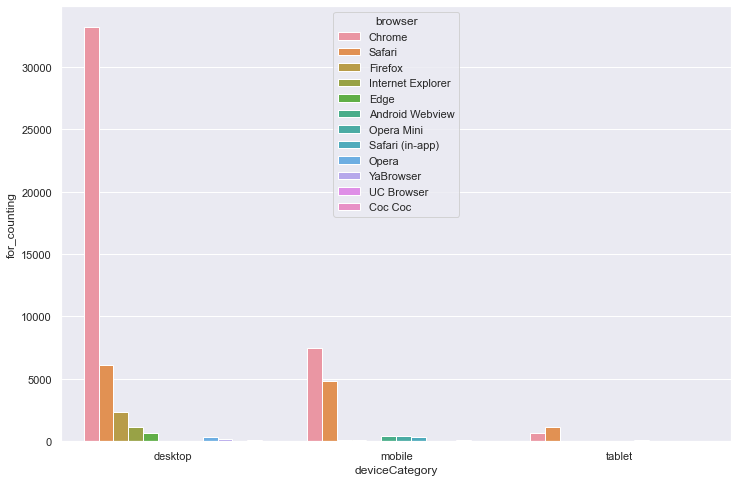

In [344]:
sns.barplot(data=test, x="deviceCategory", y="for_counting", hue="browser")

In [76]:
device_count = device.deviceCategory.value_counts().rename_axis('device').reset_index(name='count')
device_count["percent"] = round((device_count["count"] / device_count["count"].sum())*100,2)
device_count

device  count  percent
0  desktop  44200    73.67
1   mobile  13782    22.97
2   tablet   2018     3.36

In [319]:
#px.bar(device, x="deviceCategory",color_discrete_sequence=px.colors.sequential.Plasma)

In [79]:
# sns.set_theme(style="darkgrid")
# ax = sns.countplot(x="deviceCategory", data=device,palette= "flare")

In [72]:
# px.histogram(device, x="deviceCategory", title="Device used by GStore visitors",color="deviceCategory",color_discrete_sequence=px.colors.sequential.Plasma)

In [78]:
px.bar(device_count, x="device", y="count", title="Device used by GStore visitors",
color="device",color_discrete_sequence=px.colors.sequential.Plasma,
text=device_count['percent'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [ ]:
# pie chart desktop and mobile 

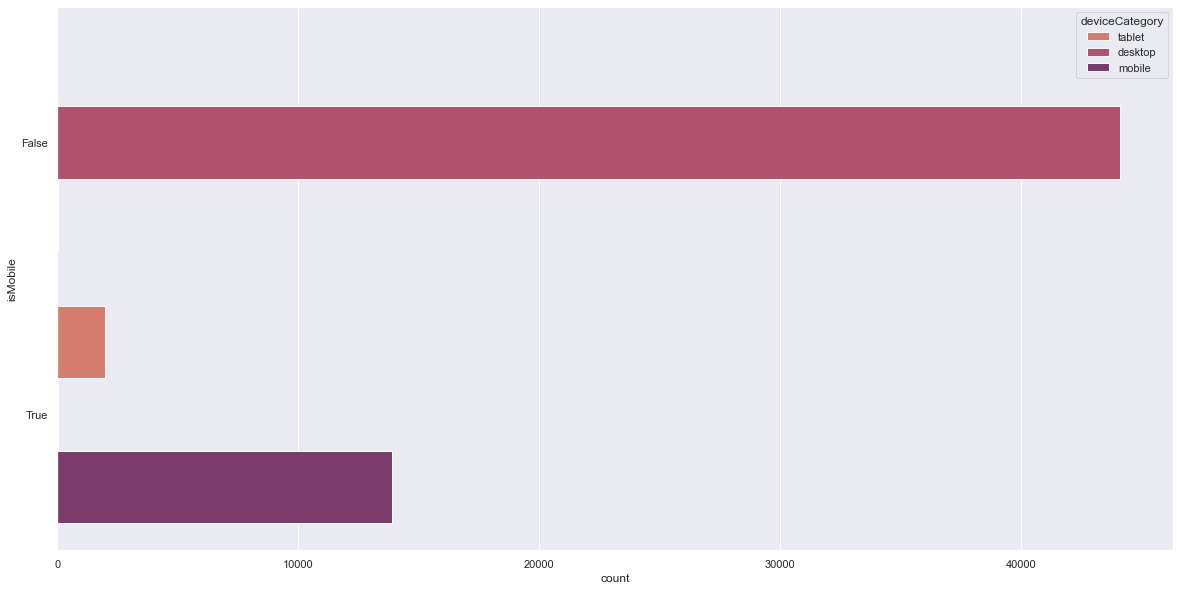

In [289]:
# not telling much
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(y="isMobile", data=device, hue="deviceCategory",palette="flare")

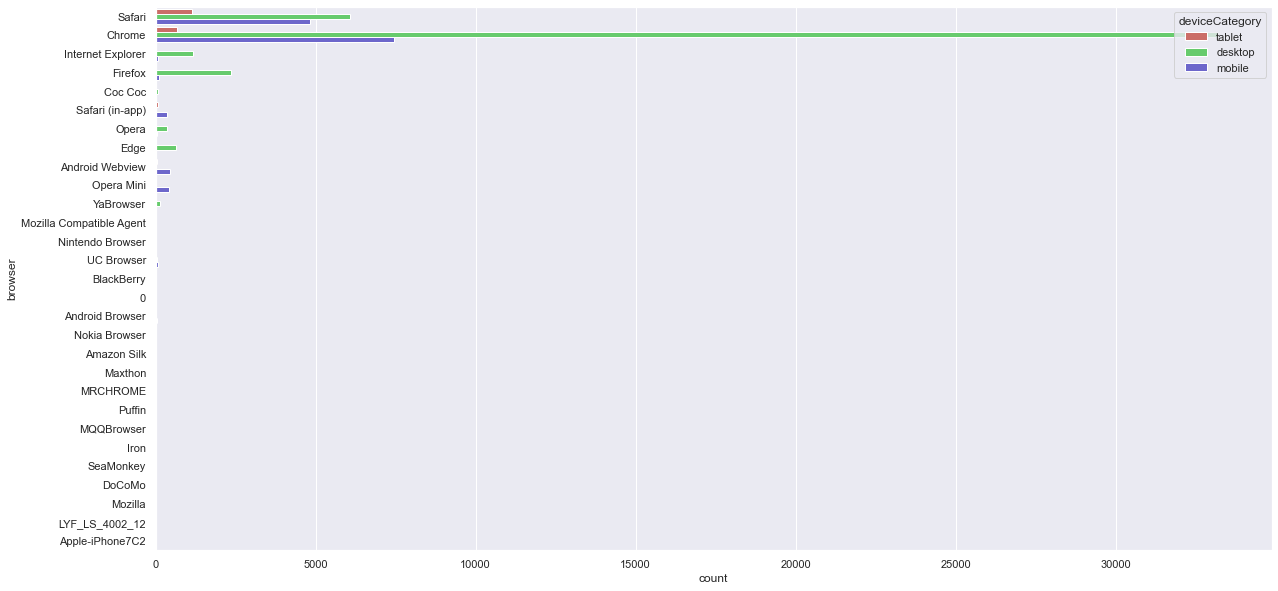

In [325]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(y="browser", data=device, hue="deviceCategory",palette="hls")

In [121]:
most_used_browser = device.groupby("browser")["isMobile"].count().sort_values(ascending=False).reset_index()[:10]
most_used_browser.columns=["browser","count"]
most_used_browser["percent"] = round((most_used_browser["count"] / most_used_browser["count"].sum())*100,2)
most_used_browser


browser  count  percent
0             Chrome  41103    68.90
1             Safari  12231    20.50
2            Firefox   2439     4.09
3  Internet Explorer   1286     2.16
4               Edge    672     1.13
5    Android Webview    562     0.94
6    Safari (in-app)    454     0.76
7         Opera Mini    395     0.66
8              Opera    373     0.63
9          YaBrowser    143     0.24

In [122]:
fig = px.bar(most_used_browser, x="count", y="browser", title="Browser used by visitors to reach GStore",
orientation='h',
color="browser",color_discrete_sequence=px.colors.sequential.Plasma_r,
text=most_used_browser['percent'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.show()

In [101]:
# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(12,8)})
# sns.barplot(y="browser",x="count", data=most_used_browser[:10],palette="flare")

In [103]:
OS = device.groupby("operatingSystem")["isMobile"].count().sort_values(ascending=False).reset_index()[:10]
OS.columns=["os","count"]
OS["percent"] = round((OS["count"] / OS["count"].sum())*100,2)
OS

os  count  percent
0        Windows  23165    38.62
1      Macintosh  16869    28.13
2        Android   8097    13.50
3            iOS   7198    12.00
4          Linux   2424     4.04
5      Chrome OS   1813     3.02
6      (not set)    298     0.50
7  Windows Phone     80     0.13
8        Samsung     21     0.04
9     BlackBerry     13     0.02

In [107]:
fig = px.bar(OS, x="count", y="os", title="OS used by visitors on their devices",
orientation='h',
color="os",color_discrete_sequence=px.colors.sequential.Plasma_r,
text=OS['percent'].apply(lambda x: '{0:1.2f}%'.format(x)))
fig.show()

In [108]:
# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(12,8)})
# sns.barplot(y="os",x="count", data=OS[:10],palette="mako")

In [164]:
# Analysis on totals

# relation on newvisits and transactionRevenue
# hits to categorical - boxplot, barplot, scatterplot
# bounces ?? people leaving teh website?
# histogram TR as category yes or no with all others

totals

visits hits pageviews bounces newVisits transactionRevenue
0          1    1         1       1       NaN                NaN
1          1    1         1       1         1                NaN
2          1    1         1       1       NaN                NaN
3          1    1         1       1         1                NaN
4          1    2         2     NaN         1                NaN
...      ...  ...       ...     ...       ...                ...
59995      1    1         1       1       NaN                NaN
59996      1    1         1       1       NaN                NaN
59997      1    6         6     NaN         1                NaN
59998      1    1         1       1       NaN                NaN
59999      1    1         1       1         1                NaN

[60000 rows x 6 columns]

In [165]:
# what to do with the NaN values? bounces and new.Visits can be filled with 0 to have categorical data, transactionRevenue can be filled with 0 as well to have the column reporting all intergers. I will add one more categorical column to identify users who generated revenue and users who didn't.
#  Pageviewslast has only 8 null data that I will fill with the number 1 as the mode of the column.
totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   visits              60000 non-null  object
 1   hits                60000 non-null  object
 2   pageviews           59994 non-null  object
 3   bounces             29849 non-null  object
 4   newVisits           46588 non-null  object
 5   transactionRevenue  771 non-null    object
dtypes: object(6)
memory usage: 2.7+ MB


In [166]:
totals.pageviews.value_counts()

1      29972
2       9576
3       4918
4       3100
5       2152
       ...  
179        1
134        1
112        1
123        1
132        1
Name: pageviews, Length: 109, dtype: int64

In [167]:
totals[totals.pageviews.isnull()]

visits hits pageviews bounces newVisits transactionRevenue
3991       1    2       NaN     NaN       NaN                NaN
33910      1    1       NaN     NaN       NaN                NaN
34738      1    2       NaN     NaN       NaN                NaN
37039      1    2       NaN     NaN       NaN                NaN
42234      1    1       NaN     NaN       NaN                NaN
44210      1    1       NaN     NaN         1                NaN

In [168]:
totals.bounces.fillna(0,inplace=True)
totals.newVisits.fillna(0,inplace=True)
totals.transactionRevenue.fillna(0,inplace=True)
totals.pageviews.fillna(1,inplace=True)

In [169]:
# converting dtypes to proper ones
totals.transactionRevenue = totals.transactionRevenue.astype("int64")
totals.visits = totals.visits.astype("int64")
totals.hits = totals.hits.astype("int64")
totals.pageviews = totals.pageviews.astype("int64")
totals.newVisits = totals.newVisits.astype("category")
totals.bounces = totals.bounces.astype("category")

In [170]:
totals.hits.value_counts()

1      29590
2       9156
3       4711
4       2902
5       2037
       ...  
168        1
151        1
215        1
134        1
111        1
Name: hits, Length: 143, dtype: int64

In [171]:
totals.pageviews.value_counts()

1      29978
2       9576
3       4918
4       3100
5       2152
       ...  
88         1
179        1
134        1
110        1
116        1
Name: pageviews, Length: 109, dtype: int64

In [172]:
# reducing number of hits and pageviews for visualizations, creating bins to include values 
totals['hits_label'] = totals['hits'].apply(lambda value: "1-2" if value >= 0 else "3-5" if value >= 3 else "6-10" if value >= 6 else "10-20" if value >= 10 else "more than 20")
totals['pageviews_label'] = totals['pageviews'].apply(lambda value: "1-2" if value >= 0 else "3-5" if value >= 3 else "6-10" if value >= 6 else "10-20" if value >= 10 else "more than 20")
totals.head()

visits  hits  pageviews bounces newVisits  transactionRevenue hits_label  \
0       1     1          1       1         0                   0        1-2   
1       1     1          1       1         1                   0        1-2   
2       1     1          1       1         0                   0        1-2   
3       1     1          1       1         1                   0        1-2   
4       1     2          2       0         1                   0        1-2   

  pageviews_label  
0             1-2  
1             1-2  
2             1-2  
3             1-2  
4             1-2

In [173]:
totals['trans_label'] = totals['transactionRevenue'].apply(lambda value: 'False' if value == 0 else 'True')
# Create two additional DataFrames to traces
df1 = totals[totals["trans_label"] == "True"]
df2 = totals[totals["trans_label"] == "False"]
df1.head()

visits  hits  pageviews bounces newVisits  transactionRevenue hits_label  \
7         1    18         15       0         1            16990000        1-2   
74        1    22         18       0         1            16990000        1-2   
262       1    41         33       0         1           133960000        1-2   
297       1    18         16       0         1            24990000        1-2   
520       1    17         12       0         0            27180000        1-2   

    pageviews_label trans_label  
7               1-2        True  
74              1-2        True  
262             1-2        True  
297             1-2        True  
520             1-2        True

In [174]:
# https://stackoverflow.com/questions/52467562/how-to-make-countplot-in-plotly

# Create two traces, first "True" and second "False"
trace1 = go.Bar(x=df1["trans_label"], y=df1["hits_label"], name="True")
trace2 = go.Bar(x=df1["trans_label"], y=df1["hits_label"], name="False")
# Fill out  data with our traces
data = [trace1, trace2]
# Create layout and specify title, legend and so on


In [ ]:
# px.histogram(device, x="deviceCategory", title="Device used by GStore visitors",color="deviceCategory",color_discrete_sequence=px.colors.sequential.Plasma)

In [104]:
# 1 - 2 to 4 - 5 to 10 - rest
totals.hits.value_counts()

1      24807
2       7646
3       3899
4       2343
5       1717
       ...  
278        1
110        1
142        1
220        1
159        1
Name: hits, Length: 140, dtype: int64

In [88]:
totals.visits.fillna(value="0", inplace=True)
totals.newVisits.fillna(value="0", inplace=True)

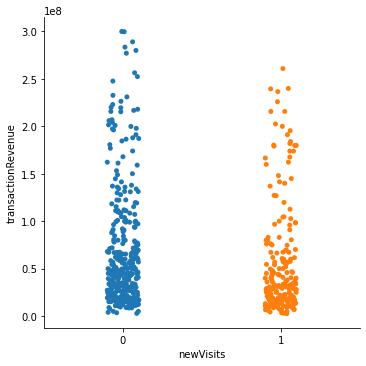

In [93]:
# +++ query the data to get specific types of data, (eg. "country=="United States""") +++
sns.catplot(x="newVisits", y="transactionRevenue", data=totals.query("transactionRevenue  < 300000000"))

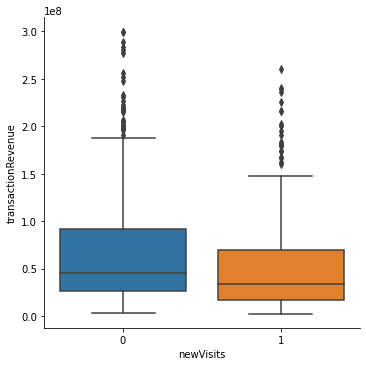

In [94]:
sns.catplot(x="newVisits", y="transactionRevenue", data=totals.query("transactionRevenue  < 300000000"),kind="box")

In [64]:
totals.bounces = totals.bounces.astype(float)

In [65]:
totals.dtypes

visits                 object
hits                   object
pageviews              object
newVisits              object
bounces               float64
transactionRevenue     object
dtype: object

In [66]:
totals.isnull().sum()

visits                    0
hits                      0
pageviews                10
newVisits             11267
bounces               24992
transactionRevenue    49380
dtype: int64

<AxesSubplot:>

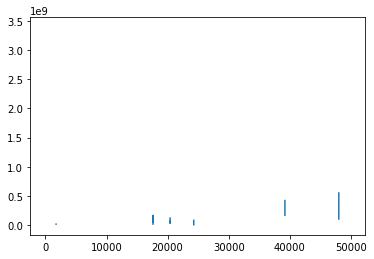

In [86]:
totals.transactionRevenue.astype("float").plot()

In [70]:
# ??? isTrueDirect either NaN or True, should I fill in  NAn with False
# drop adContent + adwordsClickInfo
# keyword useful??
# 

trafficSource

campaign               source    medium         keyword  \
0      (not set)               google   organic  (not provided)   
1      (not set)          youtube.com  referral             NaN   
2      (not set)          youtube.com  referral             NaN   
3      (not set)               google   organic  (not provided)   
4      (not set)    groups.google.com  referral             NaN   
...          ...                  ...       ...             ...   
49995  (not set)               google   organic  (not provided)   
49996  (not set)               google   organic  (not provided)   
49997  (not set)             (direct)    (none)             NaN   
49998  (not set)  mall.googleplex.com  referral             NaN   
49999  (not set)               google   organic  (not provided)   

                                        adwordsClickInfo  \
0      {'criteriaParameters': 'not available in demo ...   
1      {'criteriaParameters': 'not available in demo ...   
2      {'criteriaParameters': 'not available in demo ...   
3      {'criteriaParameters': 'not available in demo ...   
4      {'criteriaParameters': 'not available in demo ...   
...                                                  ...   
49995  {'criteriaParameters': 'not available in demo ...   
49996  {'criteriaParameters': 'not available in demo ...   
49997  {'criteriaParameters': 'not available in demo ...   
49998  {'criteriaParameters': 'not available in demo ...   
49999  {'criteriaParameters': 'not available in demo ...   

               referralPath isTrueDirect adContent  
0                       NaN          NaN       NaN  
1                /yt/about/          NaN       NaN  
2             /yt/about/th/          NaN       NaN  
3                       NaN          NaN       NaN  
4      /a/google.com/forum/          NaN       NaN  
...                     ...          ...       ...  
49995                   NaN          NaN       NaN  
49996                   NaN         True       NaN  
49997                   NaN         True       NaN  
49998                     /          NaN       NaN  
49999                   NaN          NaN       NaN  

[50000 rows x 8 columns]

In [304]:
# drop adContent, keyword, campaign, adwordsClickInfo as more than 90% of data is missing        
trafficSource.isnull().sum()

campaign                0
source                  0
medium                  0
keyword             33503
adwordsClickInfo        0
isTrueDirect        41779
referralPath        37983
adContent           59253
dtype: int64

In [303]:
trafficSource.keyword.value_counts()

(not provided)                     24248
6qEhsCssdK0z36ri                     738
google merchandise store             162
(Remarketing/Content targeting)      155
1hZbAqLCbjwfgOH7                     130
                                   ...  
google powerbank                       1
yutube                                 1
youtube on                             1
Water mug                              1
বৈশাখী স্টিকার for t-shirt             1
Name: keyword, Length: 446, dtype: int64

In [305]:
trafficSource.campaign.value_counts()

(not set)                                          57472
Data Share Promo                                    1087
AW - Dynamic Search Ads Whole Site                   907
AW - Accessories                                     494
test-liyuhz                                           24
AW - Electronics                                       7
AW - Apparel                                           4
Retail (DO NOT EDIT owners nophakun and tianyu)        4
All Products                                           1
Name: campaign, dtype: int64

In [308]:
trafficSource.isTrueDirect.fillna(value="False", inplace=True)     

In [316]:
trafficSource.drop(columns=["adContent", "keyword", "campaign", "adwordsClickInfo"],inplace=True)

In [317]:
trafficSource

source    medium isTrueDirect   referralPath
0                    google   organic         True            NaN
1                    google   organic        False            NaN
2                    google   organic        False            NaN
3                    google   organic        False            NaN
4      moma.corp.google.com  referral         True              /
...                     ...       ...          ...            ...
59995              (direct)    (none)         True            NaN
59996              (direct)    (none)         True            NaN
59997                google   organic        False            NaN
59998                google   organic        False            NaN
59999           youtube.com  referral        False  /yt/about/es/

[60000 rows x 4 columns]